# Example usage of the HCATNetwork and HearticDatasetManager

This notebook briefly shows how to use the HCATNetwork and HearticDatasetManger helper modules.
[HCATNetwork](https://github.com/AAMIASoftwares-research/HCATNetwork) and [HearticDatasetManager](https://github.com/AAMIASoftwares-research/DatasetUtilities) are two modules developed by the AAMIASoftwares research team (us) to help with the development of the Heartic project.

HCATNetwork defines the standard data structures to hold graph data and is based on the [NetworkX](https://networkx.org/) library. HearticDatasetManager is a helper module to manage the Heartic dataset, load the images from our datasets in a standard data structure and transform points in different coordinates systems.

How to install and import the two modules:

In [35]:
!pip install git+https://github.com/AAMIASoftwares-research/HCATNetwork.git@google-colab
!pip install git+https://github.com/AAMIASoftwares-research/DatasetUtilities.git@google-colab

  Cloning https://github.com/AAMIASoftwares-research/HCATNetwork.git (to revision google-colab) to c:\users\zaira\appdata\local\temp\pip-req-build-zhgi3hwx
  Resolved https://github.com/AAMIASoftwares-research/HCATNetwork.git to commit e94413cce5e4fad1a00a771112bf7e66e3501d4d
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/AAMIASoftwares-research/HCATNetwork.git 'C:\Users\zaira\AppData\Local\Temp\pip-req-build-zhgi3hwx'
  Running command git checkout -b google-colab --track origin/google-colab
  branch 'google-colab' set up to track 'origin/google-colab'.
  Switched to a new branch 'google-colab'


  Cloning https://github.com/AAMIASoftwares-research/DatasetUtilities.git (to revision google-colab) to c:\users\zaira\appdata\local\temp\pip-req-build-pr2gkw8n
  Resolved https://github.com/AAMIASoftwares-research/DatasetUtilities.git to commit abbffcb17dc017057ea1db6c361aecba70cf76f5
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Cloning https://github.com/AAMIASoftwares-research/HCATNetwork.git (to revision google-colab) to c:\users\zaira\appdata\local\temp\pip-install-typ30aut\hcatnetwork_69cb4a028e714f90a4d7c1a67f91523d
  Resolved https://github.com/AAMIASoftwares-research/HCATNetwork.git to commi

  Running command git clone --filter=blob:none --quiet https://github.com/AAMIASoftwares-research/DatasetUtilities.git 'C:\Users\zaira\AppData\Local\Temp\pip-req-build-pr2gkw8n'
  Running command git checkout -b google-colab --track origin/google-colab
  branch 'google-colab' set up to track 'origin/google-colab'.
  Switched to a new branch 'google-colab'
  Running command git clone --filter=blob:none --quiet https://github.com/AAMIASoftwares-research/HCATNetwork.git 'C:\Users\zaira\AppData\Local\Temp\pip-install-typ30aut\hcatnetwork_69cb4a028e714f90a4d7c1a67f91523d'
  Running command git checkout -b google-colab --track origin/google-colab
  branch 'google-colab' set up to track 'origin/google-colab'.
  Switched to a new branch 'google-colab'


In [36]:
import hcatnetwork
import HearticDatasetManager

Other imports:

In [37]:
import os
import numpy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# from google.colab import drive
# drive.mount('/content/drive')

For development purposes, it would be useful to use Visual Studio Code or similar as it gives hints on the data structures and methods, and to use Copilot to speed up your coding.

## HCATNetwork

For what concerns the HCATNetwork module, you will basically need to load a centerline graph and work with that.

A graph is composed by nodes, edges and graph attributes. A node is composed by a node id (here, always a string representing a number) and some attributes. An edge is composed by a source node id, a target node id and some attributes. Graph attributes, as well as node and edge attributes are just a dictionary of key-value pairs.

To have a look at which atributes the graph, nodes and edges have, have a look at [HCATNetwork's github page](https://github.com/AAMIASoftwares-research/HCATNetwork): just enter in hcatnetwork/graph, hcatnetwork/edge and hcatnetwork/node to check out the attributes in "SimpleCenterlineGraph", "SimpleCenterlineEdge" and "SimpleCenterlineNode" classes.

In [38]:
print(hcatnetwork.node.SimpleCenterlineNodeAttributes.__annotations__)
print(hcatnetwork.edge.SimpleCenterlineEdgeAttributes.__annotations__)
print(hcatnetwork.graph.SimpleCenterlineGraphAttributes.__annotations__)

{'r': <class 'float'>, 't': <class 'float'>, 'topology': <enum 'ArteryNodeTopology'>, 'side': <enum 'ArteryNodeSide'>}
{'weight': <class 'float'>, 'euclidean_distance': <class 'float'>}
{'image_id': 'str', 'are_left_right_disjointed': 'bool'}


In [39]:
# Get file names and plot graph
cat08_dataset_folder = "C:/Users/zaira/Documents/uni/HIGH_PERFORMANCE_COMPUTING/Neuroengineering/project/heart_data/CAT08"
from HearticDatasetManager.cat08.dataset import DATASET_CAT08_GRAPHS
cat08_graph_file = os.path.join(
    cat08_dataset_folder,
    DATASET_CAT08_GRAPHS[0]
)

asoca_dataset_folder = "C:/Users/zaira/Documents/uni/HIGH_PERFORMANCE_COMPUTING/Neuroengineering/project/heart_data/ASOCA"
from HearticDatasetManager.asoca.dataset import DATASET_ASOCA_GRAPHS_RESAMPLED_05MM_DICT
asoca_graph_file = os.path.join(
    asoca_dataset_folder,
    DATASET_ASOCA_GRAPHS_RESAMPLED_05MM_DICT["Normal"][0] # "Normal", or "Diseased", from 0 to 19
)

# load and view graphs
g = hcatnetwork.io.load_graph(
    file_path=cat08_graph_file,
    output_type=hcatnetwork.graph.SimpleCenterlineGraph
)

# hcatnetwork.draw.draw_simple_centerlines_graph_2d(g)
# hcatnetwork.draw.draw_simple_centerlines_graph_2d(g, backend="networkx") # use this
# hcatnetwork.draw.draw_simple_centerlines_graph_2d(g, backend="debug")

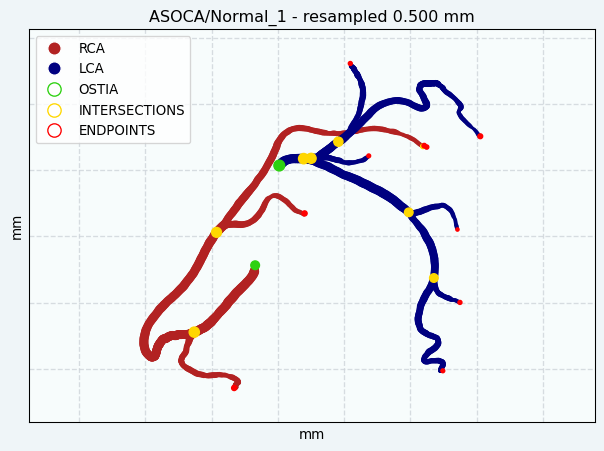

In [40]:
g = hcatnetwork.io.load_graph(
    file_path=asoca_graph_file,
    output_type=hcatnetwork.graph.SimpleCenterlineGraph
)
hcatnetwork.draw.draw_simple_centerlines_graph_2d(g, backend="networkx")
# to plot, you can also use networkx native functions
# In Colab, you cannot zoom in on graphs, so until you do not have to
# train your models on GPUs, consider developing everything from your PCs
# for a better and easier experience.

The *SimpleCenterlineGraph* class that holds the graph data structure is just a wrapper around a networkx graph. This means that you can use any networkx functions on it, like finding the shortest path, plotting, and other utilities.
Basically, it is just a networkx. Graph with strong type checking on its attributes, as well as on its nodes's and its edges's attributes.

Check out [NetworkX's website](https://networkx.org/documentation/stable/tutorial.html) for a quick tutorial on the most basic operations, such as retrieving nodes, edges, and their attributes.

In [41]:
# Get nodes info
# networkx.org
print("Graph attributes dictionary:\n", g.graph, "\n")

for i, n in enumerate(g.nodes):
  print(f"({i}) Node \"{n}\" attributes: {g.nodes[n]}")
  # Node ids are ints converted into strings.
  # A node id is not representative at all of the
  # position of the node, it is just a name assigned to it,
  # nothing more.
  # When in doubt on a node attribute, just check:
  # https://github.com/AAMIASoftwares-research/HCATNetwork/blob/google-colab/hcatnetwork/node/node.py
  if i > 5:
    break # you get the idea
print()

# edges
for i, (n1, n2) in enumerate(g.edges):
  # n1 is the source node, n2 the target node
  print(f"({i}) Edge from \"{n1}\" to  \"{n2}\" with attributes: {g.get_edge_data(n1, n2)}")
  if i > 5:
    break
print()

Graph attributes dictionary:
 {'image_id': 'ASOCA/Normal_1 - resampled 0.500 mm', 'are_left_right_disjointed': True} 

(0) Node "3039" attributes: {'x': 230.02615356445312, 'y': 243.5576934814453, 'z': -89.78585052490234, 'r': 1.8917913147124796, 't': 0.0, 'topology': <ArteryNodeTopology.INTERSECTION: 3>, 'side': <ArteryNodeSide.LEFT: 2>}
(1) Node "1" attributes: {'x': 230.47400135567534, 'y': 243.56299092373087, 'z': -90.02835183160373, 'r': 1.8432867781293303, 't': 0.0, 'topology': <ArteryNodeTopology.SEGMENT: 2>, 'side': <ArteryNodeSide.LEFT: 2>}
(2) Node "2" attributes: {'x': 230.8547878343426, 'y': 243.62986855509962, 'z': -90.36635773709583, 'r': 1.717448218195238, 't': 0.0, 'topology': <ArteryNodeTopology.SEGMENT: 2>, 'side': <ArteryNodeSide.LEFT: 2>}
(3) Node "3" attributes: {'x': 231.26809675053815, 'y': 243.71685657511267, 'z': -90.66364506933154, 'r': 1.588791885055068, 't': 0.0, 'topology': <ArteryNodeTopology.SEGMENT: 2>, 'side': <ArteryNodeSide.LEFT: 2>}
(4) Node "4" attr

How to work with node data:

In [42]:
example_node_id = "150"

# Get raw node attributes ( a dictionary)
node_attr = g.nodes[example_node_id]
print(type(node_attr), node_attr)

# Get a SimpleCenterlineNode object
node_attr = hcatnetwork.node.SimpleCenterlineNodeAttributes(**g.nodes[example_node_id])
# now, you have a series of methods at your disposal to make code cleaner and life easier
print(node_attr.get_vertex_list)
print(node_attr.get_vertex_numpy_array)
print(node_attr.get_vertex_and_radius_list)
print(node_attr.get_vertex_and_radius_numpy_array)

<class 'dict'> {'x': 221.0045569053825, 'y': 249.78966989916537, 'z': -165.27216632424827, 'r': 1.0551708499587629, 't': 0.0, 'topology': <ArteryNodeTopology.SEGMENT: 2>, 'side': <ArteryNodeSide.RIGHT: 1>}
<bound method VertexNodeAttributes.get_vertex_list of {'x': 221.0045569053825, 'y': 249.78966989916537, 'z': -165.27216632424827, 'r': 1.0551708499587629, 't': 0.0, 'topology': <ArteryNodeTopology.SEGMENT: 2>, 'side': <ArteryNodeSide.RIGHT: 1>}>
<bound method VertexNodeAttributes.get_vertex_numpy_array of {'x': 221.0045569053825, 'y': 249.78966989916537, 'z': -165.27216632424827, 'r': 1.0551708499587629, 't': 0.0, 'topology': <ArteryNodeTopology.SEGMENT: 2>, 'side': <ArteryNodeSide.RIGHT: 1>}>
<bound method SimpleCenterlineNodeAttributes.get_vertex_and_radius_list of {'x': 221.0045569053825, 'y': 249.78966989916537, 'z': -165.27216632424827, 'r': 1.0551708499587629, 't': 0.0, 'topology': <ArteryNodeTopology.SEGMENT: 2>, 'side': <ArteryNodeSide.RIGHT: 1>}>
<bound method SimpleCenterli

Edge data are the same, but since you just have two equivalent attributes ('weight' and 'euclidean_distance')
you can simply:

In [43]:
dist = g.get_edge_data("3039", "1106")["euclidean_distance"]
print(dist)

0.7696390142005857


While for graph attributes:

In [53]:
graph_name = g.graph["image_id"]
print(graph_name)

ASOCA/Normal_1 - resampled 0.500 mm


Graphs have also a series of utilities associated with them. You can check them out on networkx.
Here, I'll illustrate some of the utilities of the hcatnetwork package.

('2924',)
('2924', '0')
ArteryNodeTopology.OSTIUM ArteryNodeSide.LEFT
ArteryNodeTopology.OSTIUM ArteryNodeSide.RIGHT


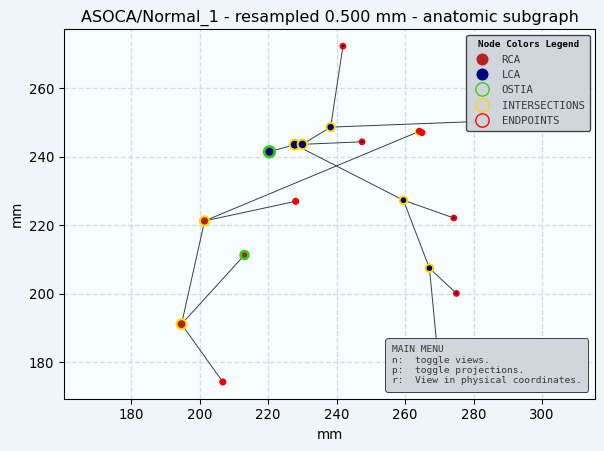

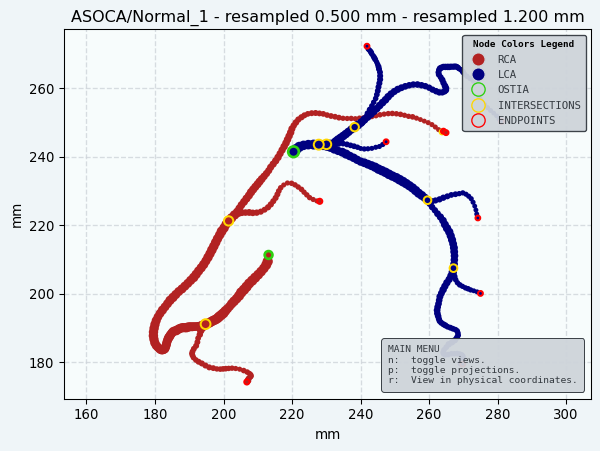

In [45]:
# Get the node id of the coronary ostium/ostia associated with a node
# A tuple is returned, where the first element, if present, is the left ostium
# and the second one the right ostium
ids = g.get_relative_coronary_ostia_node_id("6")
print(ids)

# Get the ids of the two coronary ostia
ids = g.get_coronary_ostia_node_id()
print(ids)
print(g.nodes[ids[0]]["topology"], g.nodes[ids[0]]["side"])
print(g.nodes[ids[1]]["topology"], g.nodes[ids[1]]["side"])

# Get the anatomic subgraph, meaning the graph made only of
# coronary ostia, intersections and endpoints
anatomic_sub_g = g.get_anatomic_subgraph()
hcatnetwork.draw.draw_simple_centerlines_graph_2d(anatomic_sub_g)

# Resample the graph
# This might be important to you. You can both upsample and downsample
# depending on your needs.
# Graphs in the datasets are provided, for each image, both as the original dataset,
# both as resampled from the original graph once every 0.5 mm.
resampled_graph = g.resample(mm_between_nodes=1.2)
hcatnetwork.draw.draw_simple_centerlines_graph_2d(resampled_graph)

### Frame of reference

Graph live in their own coordinates frame, which is not the same the image lives in. Put simply, if you plot the image and the graph together, they will not overlap.
As we will see in the HearticdatasetManager section, it is useful to conver everything in the same coordinates system, called RAS (Right, Anterior, Superior).

Basically, this coords. system puts the image and the centerlines coordinates in the same space, a space that is coherent with your own view, as if the heart in the CT image were yours. So, x is positive to your right, y is positive forward, an z is positive upward.

To better understand this, you can open un 3D Slicer, import an image, enable 3D rendering for that image and set the coordinates system visible as a human figure (in the 3d visualization window, in the upper left corner, there is a drop down window with some options: look there for either a small human figure or some colorful arrows).

### Creating data to be visualized in slicer starting from numpy arrays or from graphs

This brief introduction was needed because, when exporting a graph or any kind of data to be visualized in 3D slicer, you need to transform it in the correct frame of reference so that the points will be consistent with the image's content.

> Note:
>
> "fiducials" in 3D Slicer are just a set of uncorrelated points.
>
> "open curve" is more similar to a graph, or rather a single filament: it is a set of points sequentially connected.

Try the following example:

In [54]:
import json
from hcatnetwork.utils.slicer import numpy_array_to_fiducials_json, numpy_array_to_open_curve_json

# For numpy arrays
pts = []
for i, v in enumerate(g.nodes.values()):
  if i > 10:
    break
  pts.append([v["x"], v["y"], v["z"]])
pts = numpy.array(pts)

json_string = numpy_array_to_fiducials_json(pts)
print(json_string)
json_string = numpy_array_to_open_curve_json(pts)
print(json_string)

# You do not actually care why the strings look the way they look.
# Just be sure to save them with the .Slicer.mkr.json extension

if 0:
  with open("file/to/save/stuff/in.Slicer.mkr.json") as f:
    f.write(json_string)

{
    "@schema": "https://raw.githubusercontent.com/slicer/slicer/master/Modules/Loadable/Markups/Resources/Schema/markups-schema-v1.0.3.json#",
    "markups": [
        {
            "type": "Fiducial",
            "coordinateSystem": "RAS",
            "coordinateUnits": "mm",
            "locked": true,
            "fixedNumberOfControlPoints": true,
            "labelFormat": "%N-%d",
            "lastUsedControlPointNumber": 10,
            "controlPoints": [
                {
                    "id": "0",
                    "label": "0",
                    "description": "",
                    "associatedNodeID": "",
                    "position": [
                        230.02615356445312,
                        243.5576934814453,
                        -89.78585052490234
                    ],
                    "orientation": [
                        1.0,
                        0.0,
                        0.0,
                        0.0,
                        1

If you load the image, you will see that the arteries are not at all coherent with the image.
You have to transform the data to the right coords sys before exporting it to slicer:

In [55]:
from HearticDatasetManager.affine import apply_affine_3d
from HearticDatasetManager.asoca import AsocaImageCT
from HearticDatasetManager.asoca.dataset import DATASET_ASOCA_IMAGES_DICT

asoca_graph_file = os.path.join(
    asoca_dataset_folder,
    DATASET_ASOCA_IMAGES_DICT["Normal"][0]
)

image = AsocaImageCT(asoca_graph_file)
transform = image.affine_centerlines2ras_slicer

pts = apply_affine_3d(transform, pts.T).T

json_string = numpy_array_to_fiducials_json(pts)
if 0:
  with open("file/to/save/stuff/in.Slicer.mkr.json") as f:
    f.write(json_string)

As you see, now the image and the exported data are coherent.

To export the entire graph directly, just do:

In [56]:
save_folder = "C:/Users/zaira/Documents/uni/HIGH_PERFORMANCE_COMPUTING/Neuroengineering/project/slicer_images"

hcatnetwork.utils.slicer.convert_graph_to_3dslicer_fiducials(
    graph=g,
    save_filename=os.path.join(save_folder, "fiducials.ext") # Why .ext? Because the function will set the correct extension itself
)
hcatnetwork.utils.slicer.convert_graph_to_3dslicer_opencurve(
    graph=g,
    save_directory=save_folder
)

## HearticDatasetManager

For what concerns the HearticDatasetManager module, you will basically need to load the images and the annotations from the dataset and work with that.

If you do not change the structure of the datasets that were provided to you, you can use the default values to load the datasets, as shown in the HCATNetwork example above.

For each of the two datasets, this dataset manager offers a standard data structure in which to hold the CT image and some related data.

We already discussed about the different coordinates systems above. The image automatically builds all the affine transformations required to relate the image with the data.

In [49]:
# Open an image
from HearticDatasetManager.asoca import AsocaImageCT
from HearticDatasetManager.asoca.dataset import DATASET_ASOCA_IMAGES_DICT

asoca_graph_file = os.path.join(
    asoca_dataset_folder,
    DATASET_ASOCA_IMAGES_DICT["Normal"][0]
)

image = AsocaImageCT(asoca_graph_file)

print(image.name)
print(image.data.shape) # the actual CT data in (i, j, k) (i ~ x, k ~ y, k ~ z)
print(image.bounding_box)
print(image.origin)     # In the RAS coordinate system, this is the origin of the image
print(image.spacing)    # Pixel spacing in the x, y and z directions (in mm)

# to see all the available affines, start writing image.affine_
# and check out what the autocompletion tool shows you.
# The most important one is:
print(image.affine_centerlines2ras)

ASOCA/Normal_1
(512, 512, 204)
BoundingBoxDict(lower: [ -95.7841793   -92.58418235 -196.875     ], upper: [116.80000305 120.         -70.        ])
[ 116.80000305  120.         -196.875     ]
[0.416016 0.416016 0.625   ]
[[ -1.          0.          0.        233.6000061]
 [  0.         -1.          0.        240.       ]
 [  0.          0.          1.          0.       ]
 [  0.          0.          0.          1.       ]]


Lets view an image section in the 3D space with respect with the image bounding box.




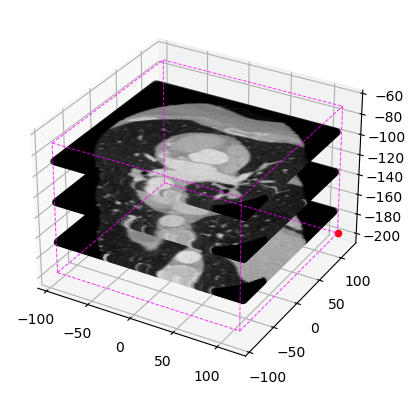

In [58]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"})
xl, yl, zl = image.bounding_box.get_xlim(), image.bounding_box.get_ylim(), image.bounding_box.get_zlim()
ax.set_xlim([xl[0]-10, xl[1]+10])
ax.set_ylim([yl[0]-10, yl[1]+10])
ax.set_zlim([zl[0]-10, zl[1]+10])
ax.add_artist(image.bounding_box.get_artist())
ax.scatter(image.origin[0], image.origin[1], image.origin[2], c="r")
# get image samples # lower
for zs in [-180, -140, -100]:
  points_to_sample = []
  for xs in range(-110, 110, 2):
    for ys in range(-70, 130, 2):
      points_to_sample.append([xs, ys, zs])
  points_to_sample = numpy.array(points_to_sample) # N x 3
  samples = image.sample(points_to_sample.T, interpolation="nearest")
  # plot them
  ax.scatter(points_to_sample[:,0], points_to_sample[:,1], points_to_sample[:,2], c=samples, cmap="gray")
plt.show()

As you can see from the image above, the heart is correctly oriented, as if it was our own and we were to observe it from our own point of view.


The image.sample() function basically retrieves the image "color" (the Hounsfield Units) at a point, or array of points, with coordinates coherent with the image space.
If points are sampled outside the image bounding box, the sample is set to the minimum of the image.

Now, this will be used to sample the image in whichever way you want.

To make sampling easier, the HearticdatasetManager.affine has some methods to transform the data points.

For example:

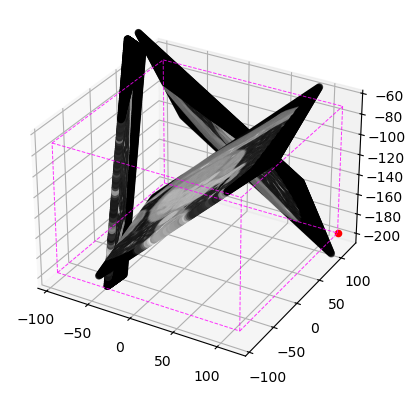

In [63]:
from HearticDatasetManager.affine import apply_affine_3d
from HearticDatasetManager.affine import get_affine_3d_rotation_around_vector

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"})
xl, yl, zl = image.bounding_box.get_xlim(), image.bounding_box.get_ylim(), image.bounding_box.get_zlim()
ax.set_xlim([xl[0]-10, xl[1]+10])
ax.set_ylim([yl[0]-10, yl[1]+10])
ax.set_zlim([zl[0]-10, zl[1]+10])
ax.add_artist(image.bounding_box.get_artist())
ax.scatter(image.origin[0], image.origin[1], image.origin[2], c="r")
# get image samples # lower
for zs in [-180, -140, -100]:
  points_to_sample = []
  for xs in range(-110, 110, 2):
    for ys in range(-70, 130, 2):
      points_to_sample.append([xs, ys, zs])
  points_to_sample = numpy.array(points_to_sample) # N x 3
  # Transform those points
  v_source = numpy.array([
      numpy.random.randint(low=-90, high=90),
      numpy.random.randint(low=-50, high=100),
      zs])
  alpha = numpy.random.rand()*2*numpy.pi
  transform = get_affine_3d_rotation_around_vector(
      vector=numpy.array([0, 0.5*(numpy.random.rand()-0-5), 1]),
      vector_source=v_source,
      rotation=alpha,
  )
  points_to_sample = apply_affine_3d(transform, points_to_sample.T).T
  samples = image.sample(points_to_sample.T, interpolation="nearest")
  # plot them
  ax.scatter(points_to_sample[:,0], points_to_sample[:,1], points_to_sample[:,2], c=samples, cmap="gray")
  ax.plot([v_source[0], v_source[0]+0], [v_source[1], v_source[1]+0.1], [v_source[2], v_source[2]+1], c="green")
plt.show()

As for these two modules, you should have everything you need.

For problems with the libraries either open an issue on github or text me at matteo.leccardi@polimi.it

## PyTorch

As for pytorch, it would be such long examples that it makes no sense to report them here, especially because examples and walkthrough on [PyTorch website](https://pytorch.org/) are so complete and so well done, that I doubt I would be able to add anything to it.

The first thing to do, is to follow the [tutorial](https://pytorch.org/tutorials/beginner/basics/intro.html). Do not skip the seemingly boring part, especially the part on autodifferentiation, which is the heart of pytorch: taking derivatives automatically.

Search examples on convolutional neural networks, on the datasets and dataloader pytorch classes, and on the definition of a basic training cycle with learning rate decreasing over time, proper data augemntation whilst training.

Then, when developing the network make extensive use of the [documentation](https://pytorch.org/docs/stable/torch.html) and the [cookbook](https://pytorch.org/tutorials/recipes/recipes_index.html).

Some additional info on installation on colab can be found on the project PW3 presentation pfd file, in the last sections.

> Remember
>
> On colab, you do not have infinite GPU resources.
> To check what kind of GPU you have and how much memory it has,
> try the following command. If it does not work, maybe you should request a Colab runtime that is associated with GPU.
> Pytorch should have utilities to get these info, and parse it as a variable in your code.
> So make your code flexible for different GPU memory sizes.

In [52]:
!nvidia-smi

Tue Nov 28 11:29:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.65       Driver Version: 511.65       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   39C    P3     7W /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## A final word of advice

I would advise you, even if you work in colab, to express most of your logic in function or classes.

If it is your first time programming, chances are you will not want to use object oriented programming, and it is fine.
However, strive to define as many functions as possible, do not repeat code, and keep everything tidy.
Complexity can scakle up very quickly, and starting tidy means making things work out faster and having way less problems later.